#### In this Worfklow number 1, we are going to:
* Load and visualize the data (the graphs do not look so nice, we have to change the scale, later, we can also use always the old ones)
* Regularize the data
* For now, We skip the step of feautre engineering: lets take the variables as they are, later we see if changing the shape of the distribution and removing outlier lead to a different solucion. I will do that in Workflow number 2 ( I have done it, but it is in a different script and takes me a bit of time to incopratte here, and I want you to have and idea of the complete workflow and can start with the clustering).
* We normalize the variables
* Feature seleccion: We are not creating any new variable, we stick to our main five variables. we check the correlation. Based on time or in how this develops, we can create a diferent variable ftrom the TMI (total magnetic intensirt) or from the DEM.
* Apply clustering (you have to change the parameters, investigate twhat they mean, generate a variaty of maps, the most imporatnt paramter is k)
* create geophysical signatures, try to interpret the groups
* export to qgis
* We try to understand the correlation ( if ther is any, with the geological map).


* Just try to create a simple map, so that allows you to start thinking about the results and will help you ask you some questions.


#### In the next Workflow # 2: I am gonna:
* add to this code the part of feature engineering, so we are sure that all the requierements needed for the algorithm are satisfied. Thi s is something that we do once, and that is it. 

# 1. Load and and Visualize data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the base directory
base_dir = r"D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering"

# Define the input data folder
data_dir = os.path.join(base_dir, "initial_data")

# Load CSV files
df_mag = pd.read_csv(os.path.join(data_dir, "output_lat_long_mag_final.csv"))
df_pot = pd.read_csv(os.path.join(data_dir, "output_Pot.csv"))
df_tho = pd.read_csv(os.path.join(data_dir, "output_Thorium.csv"))
df_ura = pd.read_csv(os.path.join(data_dir, "output_Ura.csv"))
df_dem = pd.read_csv(os.path.join(data_dir, "finalDEM.csv"))

# Print dataset dimensions
print("=== DATAFRAME DIMENSIONS ===")
print(f"df_mag: {df_mag.shape}")
print(f"df_pot: {df_pot.shape}")
print(f"df_tho: {df_tho.shape}")
print(f"df_ura: {df_ura.shape}")
print(f"df_dem: {df_dem.shape}")




=== DATAFRAME DIMENSIONS ===
df_mag: (584812, 3)
df_pot: (58446, 3)
df_tho: (58446, 3)
df_ura: (58446, 3)
df_dem: (889296, 3)


##  1. Magnetic Data

 ### a. Final magnetic data

####  Representa la intensidad del campo magnético total después de aplicar correcciones estándar (IGRF, ruido, variaciones diurnas, etc.).
#### Represents the total magnetic field intensity after applying standard corrections (IGRF, noise, diurnal variations, etc.).

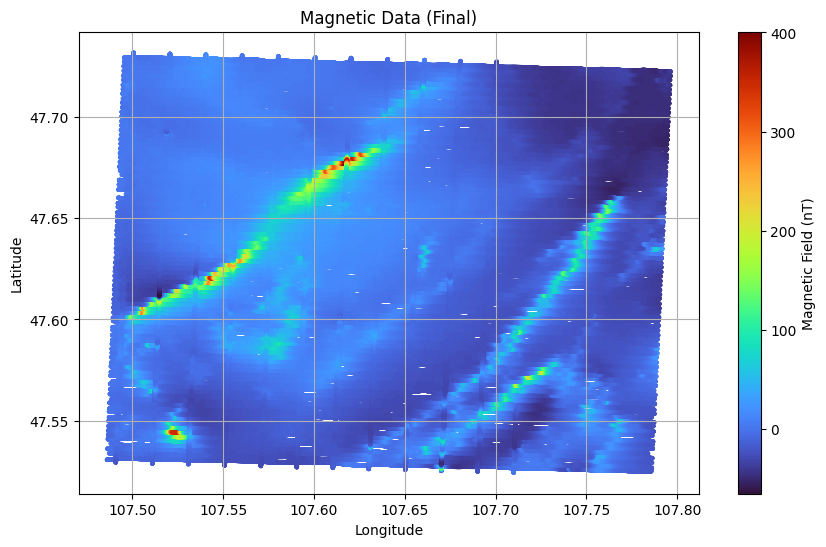

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# Graficar datos magnéticos usando latitud, longitud y el valor de Mag_Final
plt.figure(figsize=(10, 6))
plt.scatter(df_mag['Lon'], df_mag['Lat'], c=df_mag['Mag_Final'], cmap='turbo', s=5)
plt.colorbar(label='Magnetic Field (nT)')
plt.title('Magnetic Data (Final)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()



## 2. Modelo de Elevación Digital

### a. raw DEM

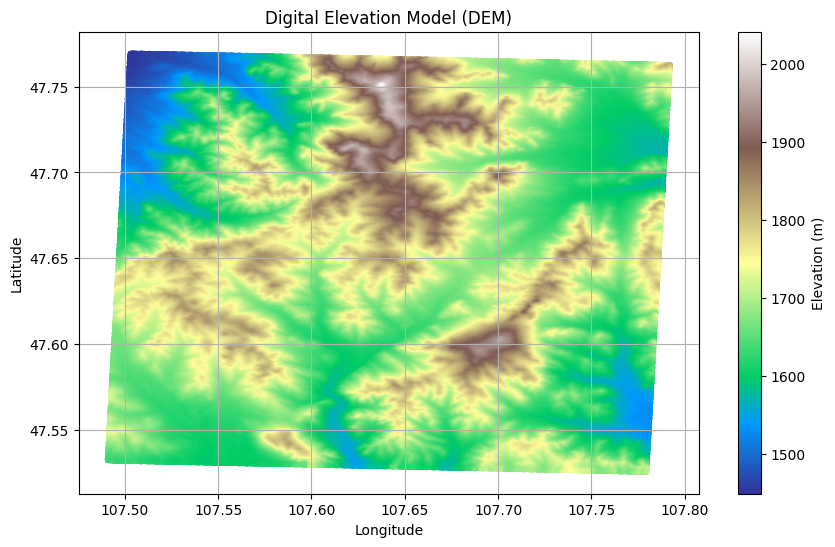

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Graficar el modelo de elevación digital
plt.figure(figsize=(10, 6))
plt.scatter(df_dem['Lon'], df_dem['Lat'], c=df_dem['VALUE'], cmap='terrain', s=5)
plt.colorbar(label='Elevation (m)')
plt.title('Digital Elevation Model (DEM)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


### b. Reduce the resolution of the DEM

Número de filas en el archivo original: 889296
Número de filas tras reducir resolución: 88930
Archivo con resolución reducida guardado en: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\created_from_DEM\DEM_reduced_resolution_factor_10.csv


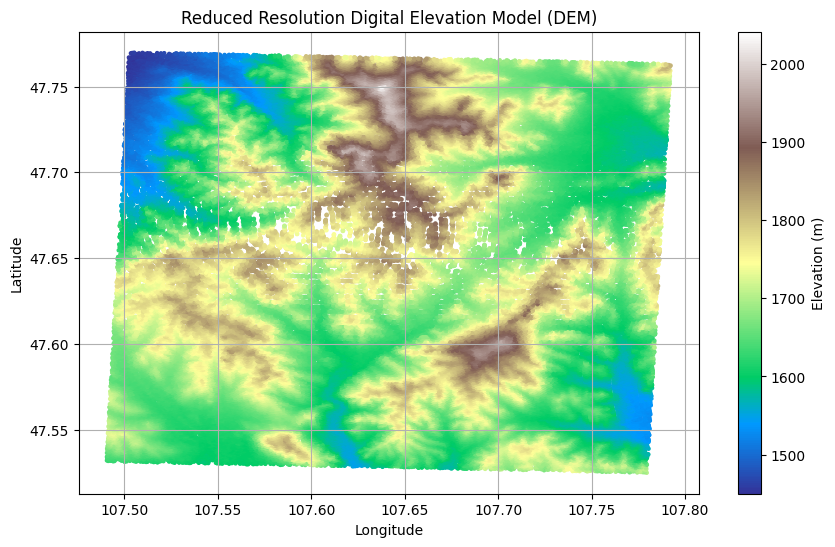

In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# ================================
# 1️⃣ Define Paths
# ================================
base_dir = r"D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering"
workflow_dir = os.path.join(base_dir, "workflow_01")  # Workflow folder

# Define input data directory
data_dir = os.path.join(base_dir, "initial_data")  
file_path = os.path.join(data_dir, "finalDEM.csv")

# Create output folder inside workflow_01
output_folder = os.path.join(workflow_dir, "created_from_DEM")
os.makedirs(output_folder, exist_ok=True)

# ================================
# 2️⃣ Load DEM Data
# ================================
df_dem = pd.read_csv(file_path)

# Sort by Latitude and Longitude
df_dem = df_dem.sort_values(by=["Lat", "Lon"]).reset_index(drop=True)

# Show original number of rows
num_filas_original = df_dem.shape[0]
print(f"Número de filas en el archivo original: {num_filas_original}")

# ================================
# 3️⃣ Reduce DEM Resolution
# ================================
resolution_factor = 10  # Adjust resolution factor (e.g., keep 1 of every 10 rows)
df_dem_reduced = df_dem.iloc[::resolution_factor, :].copy()

# Show number of rows after reduction
num_filas_reducido = df_dem_reduced.shape[0]
print(f"Número de filas tras reducir resolución: {num_filas_reducido}")

# ================================
# 4️⃣ Save Reduced DEM
# ================================
output_filename = f"DEM_reduced_resolution_factor_{resolution_factor}.csv"
output_path = os.path.join(output_folder, output_filename)

df_dem_reduced.to_csv(output_path, index=False)
print(f"Archivo con resolución reducida guardado en: {output_path}")

# ================================
# 5️⃣ Plot Reduced DEM
# ================================
plt.figure(figsize=(10, 6))
plt.scatter(df_dem_reduced['Lon'], df_dem_reduced['Lat'], 
            c=df_dem_reduced['VALUE'], cmap='terrain', s=5)
plt.colorbar(label='Elevation (m)')
plt.title('Reduced Resolution Digital Elevation Model (DEM)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


## 3. Radiometric Data

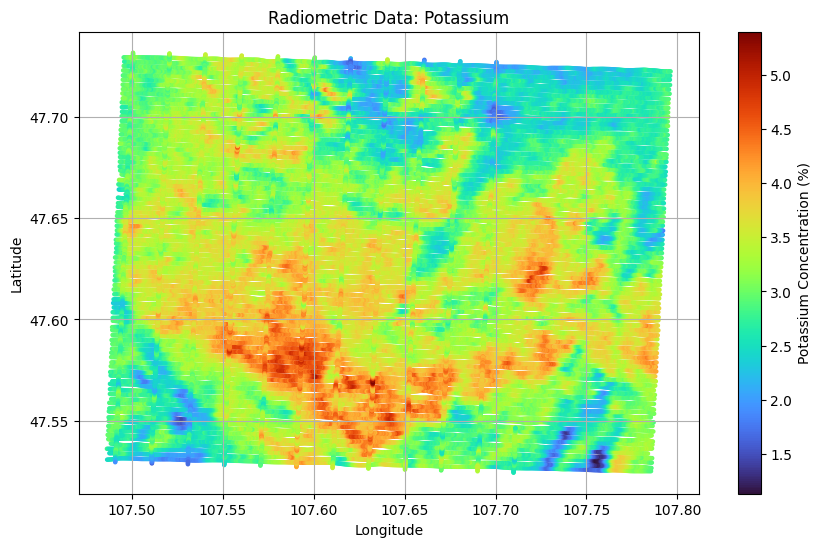

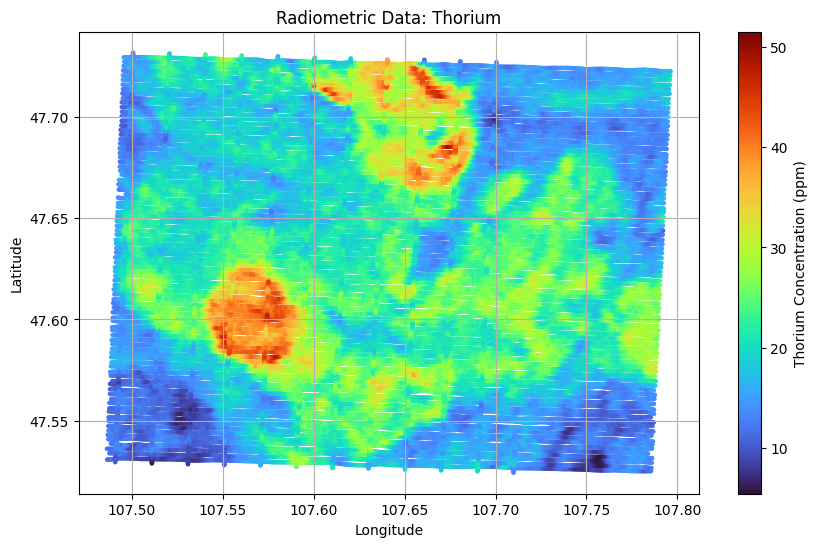

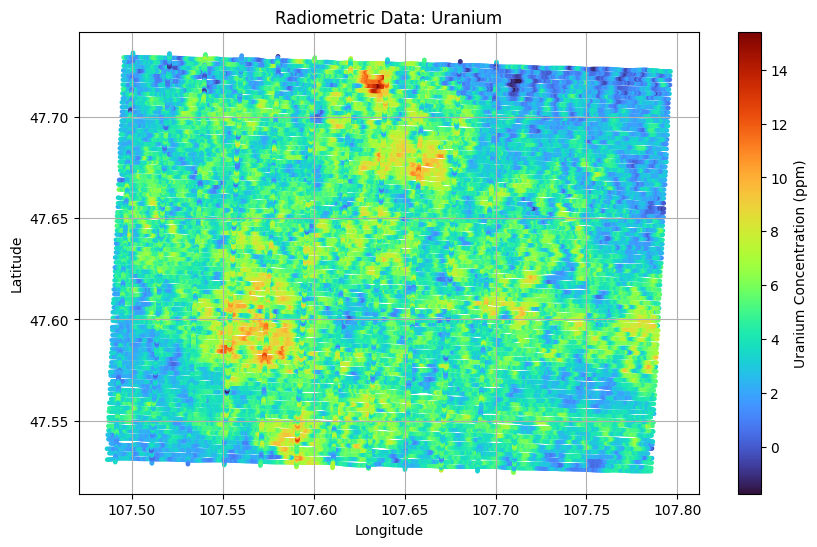

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Graficar Potasio con escala turbo
plt.figure(figsize=(10, 6))
plt.scatter(df_pot['Lon'], df_pot['Lat'], c=df_pot['Pot_final'], cmap='turbo', s=5)
plt.colorbar(label='Potassium Concentration (%)')
plt.title('Radiometric Data: Potassium')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Graficar Torio con escala turbo
plt.figure(figsize=(10, 6))
plt.scatter(df_tho['Lon'], df_tho['Lat'], c=df_tho['Tho_Final'], cmap='turbo', s=5)
plt.colorbar(label='Thorium Concentration (ppm)')
plt.title('Radiometric Data: Thorium')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Graficar Uranio con escala turbo
plt.figure(figsize=(10, 6))
plt.scatter(df_ura['Lon'], df_ura['Lat'], c=df_ura['Ura_Final'], cmap='turbo', s=5)
plt.colorbar(label='Uranium Concentration (ppm)')
plt.title('Radiometric Data: Uranium')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


# 2. Interpolación y co-localización

## a. Regularization: Lets co localize and interpolate

In [13]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# ================================
# 1️⃣ CONFIGURACIÓN DE DIRECTORIOS
# ================================
base_dir = r"D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering"
workflow_dir = os.path.join(base_dir, "workflow_01")  # Workflow directory

# Carpeta de datos iniciales
data_dir = os.path.join(base_dir, "initial_data")

# Archivo DEM con reducción de resolución
dem_file = os.path.join(workflow_dir, "created_from_DEM", "DEM_reduced_resolution_factor_10.csv")

# Carpeta base de salida para regularización
output_folder = os.path.join(workflow_dir, "regularization")
os.makedirs(output_folder, exist_ok=True)

# ================================
# 2️⃣ PARÁMETROS AJUSTABLES
# ================================
interp_method = "cubic"  # Cambia entre "nearest", "linear", "cubic"
grid_resolution = 0.002  # Ajustable

# Crear subcarpeta específica para el método de interpolación
output_method_folder = os.path.join(output_folder, f"interpolation_{interp_method}")
os.makedirs(output_method_folder, exist_ok=True)

# ================================
# 3️⃣ CARGAR DATASETS
# ================================
df_dem = pd.read_csv(dem_file)  # Solo cargamos DEM porque los otros ya están en memoria

# Renombrar columna del DEM si es necesario
if "VALUE" in df_dem.columns:
    df_dem.rename(columns={"VALUE": "DEM"}, inplace=True)

# ================================
# 4️⃣ CREAR MALLA REGULARIZADA
# ================================
lon_min, lon_max = df_dem["Lon"].min(), df_dem["Lon"].max()
lat_min, lat_max = df_dem["Lat"].min(), df_dem["Lat"].max()

# Crear malla
lon_grid = np.arange(lon_min, lon_max, grid_resolution)
lat_grid = np.arange(lat_min, lat_max, grid_resolution)
grid_x, grid_y = np.meshgrid(lon_grid, lat_grid)

print(f"Dimensiones de la malla: {grid_x.shape}")

# ================================
# 5️⃣ INTERPOLACIÓN DE VARIABLES
# ================================
def interpolate_to_grid(df, value_col, lon_col="Lon", lat_col="Lat", method="nearest"):
    points = df[[lon_col, lat_col]].values
    values = df[value_col].values
    return griddata(points, values, (grid_x, grid_y), method=method)

# Interpolar cada variable
grid_dem = interpolate_to_grid(df_dem, "DEM", method=interp_method)
grid_mag = interpolate_to_grid(df_mag, "Mag_Final", method=interp_method)
grid_pot = interpolate_to_grid(df_pot, "Pot_final", method=interp_method)
grid_tho = interpolate_to_grid(df_tho, "Tho_Final", method=interp_method)
grid_ura = interpolate_to_grid(df_ura, "Ura_Final", method=interp_method)

# ================================
# 6️⃣ CREAR DATAFRAME FINAL
# ================================
lon_flat, lat_flat = grid_x.flatten(), grid_y.flatten()
df_combined = pd.DataFrame({
    "Lon": lon_flat,
    "Lat": lat_flat,
    "DEM": grid_dem.flatten(),
    "Mag_Final": grid_mag.flatten(),
    "Pot_final": grid_pot.flatten(),
    "Tho_Final": grid_tho.flatten(),
    "Ura_Final": grid_ura.flatten()
})

# Eliminar valores nulos
df_combined.dropna(inplace=True)

print(f"Dimensiones del DataFrame final: {df_combined.shape}")

# ================================
# 7️⃣ GRAFICAR Y GUARDAR RESULTADOS
# ================================
variables = ["DEM", "Mag_Final", "Pot_final", "Tho_Final", "Ura_Final"]

for var in variables:
    if df_combined[var].nunique() > 1:
        plt.figure(figsize=(10, 6))
        plt.scatter(df_combined["Lon"], df_combined["Lat"], c=df_combined[var], cmap="turbo", s=5)
        plt.colorbar(label=var)
        plt.title(f"Interpolated: {var} (method={interp_method}, res={grid_resolution})")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.grid(True)

        # Guardar gráfico en la subcarpeta correspondiente al método
        plot_filename = f"{var}_interpolation_{interp_method}.png"
        plot_path = os.path.join(output_method_folder, plot_filename)
        plt.savefig(plot_path, dpi=300)
        plt.close()  # Cerrar figura para ahorrar memoria

        print(f"✅ Gráfico guardado: {plot_path}")
    else:
        print(f"⚠️ Advertencia: La variable {var} tiene un valor único o está vacía.")

# ================================
# 8️⃣ GUARDAR RESULTADO FINAL
# ================================
output_file = f"co_localized_{interp_method}_res{grid_resolution}.csv"
output_path = os.path.join(output_method_folder, output_file)
df_combined.to_csv(output_path, index=False)

print(f"✅ Archivo guardado: {output_path}")


Dimensiones de la malla: (123, 151)
Dimensiones del DataFrame final: (14472, 7)
✅ Gráfico guardado: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\regularization\interpolation_cubic\DEM_interpolation_cubic.png
✅ Gráfico guardado: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\regularization\interpolation_cubic\Mag_Final_interpolation_cubic.png
✅ Gráfico guardado: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\regularization\interpolation_cubic\Pot_final_interpolation_cubic.png
✅ Gráfico guardado: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\regularization\interpolation_cubic\Tho_Final_interpolation_cubic.png
✅ Gráfico guardado: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\regularization\interpolation_cubic\Ura_Final_interpolation_cubic.png
✅ Archivo guardado: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\regularization\interpolation_cubic\co_localized

# 3. Feature engineering

#### Feature Engineering: consists of creating new variables from the original data to enhance the ability of the model to find  patterns

#### we will do this later, in a second workflow, so lets skip this step. 

## Normalizar las variables

In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ================================
# 1️⃣ CONFIGURACIÓN DE DIRECTORIOS
# ================================
base_dir = r"D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering"
workflow_dir = os.path.join(base_dir, "workflow_01")  # Directorio de workflow

# Ruta del archivo interpolado que vamos a normalizar
input_file = os.path.join(workflow_dir, "regularization", "interpolation_cubic", "co_localized_cubic_res0.002.csv")

# Carpeta de salida para los datos normalizados
output_folder = os.path.join(workflow_dir, "normalized_data")
os.makedirs(output_folder, exist_ok=True)

# ================================
# 2️⃣ CARGAR DATOS
# ================================
df = pd.read_csv(input_file)

# Excluir columnas de coordenadas (Lon, Lat) para la normalización
variables = ["DEM", "Mag_Final", "Pot_final", "Tho_Final", "Ura_Final"]

# ================================
# 3️⃣ NORMALIZACIÓN (Min-Max Scaling 0-1)
# ================================
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[variables] = scaler.fit_transform(df[variables])

print("\n✅ Variables Normalizadas entre 0 y 1")

# ================================
# 4️⃣ GUARDAR RESULTADO FINAL
# ================================
output_file = "co_localized_cubic_res0.002_normalized.csv"
output_path = os.path.join(output_folder, output_file)
df_normalized.to_csv(output_path, index=False)
print(f"✅ Archivo normalizado guardado en: {output_path}")

# ================================
# 5️⃣ GRAFICAR VARIABLES NORMALIZADAS EN (Lon, Lat)
# ================================
plot_folder = os.path.join(output_folder, "plots")
os.makedirs(plot_folder, exist_ok=True)

for var in variables:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df_normalized["Lon"], df_normalized["Lat"], c=df_normalized[var], cmap="turbo", s=5)
    plt.colorbar(label=f"{var} (Normalized)")
    plt.title(f"Normalized {var} (Lon-Lat)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)

    # Guardar gráfico en la carpeta de salida
    plot_filename = f"{var}_normalized.png"
    plot_path = os.path.join(plot_folder, plot_filename)
    plt.savefig(plot_path, dpi=300)
    plt.close()  # Cierra la figura para ahorrar memoria

    print(f"✅ Gráfico guardado: {plot_path}")




✅ Variables Normalizadas entre 0 y 1
✅ Archivo normalizado guardado en: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\normalized_data\co_localized_cubic_res0.002_normalized.csv
✅ Gráfico guardado: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\normalized_data\plots\DEM_normalized.png
✅ Gráfico guardado: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\normalized_data\plots\Mag_Final_normalized.png
✅ Gráfico guardado: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\normalized_data\plots\Pot_final_normalized.png
✅ Gráfico guardado: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\normalized_data\plots\Tho_Final_normalized.png
✅ Gráfico guardado: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\normalized_data\plots\Ura_Final_normalized.png


# 4. Feature selection

## Correlation

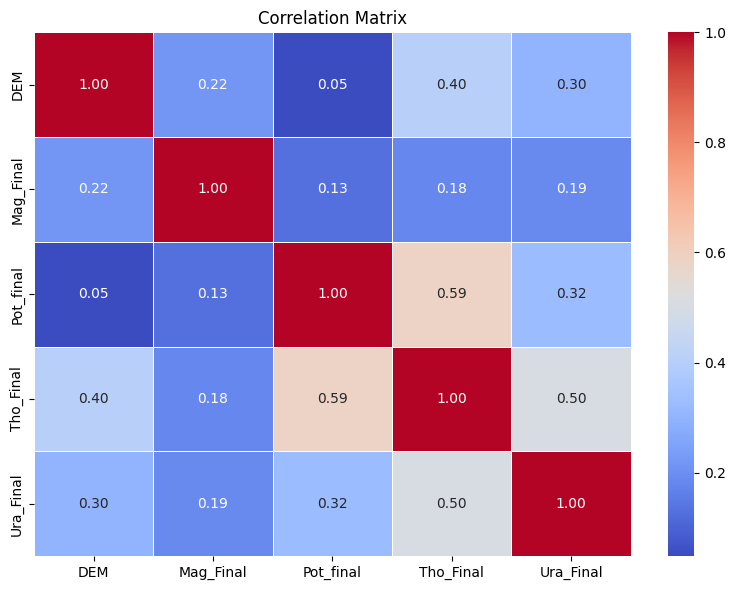

✅ Matriz de correlación guardada en: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\normalized_data\correlation_matrix.png


In [16]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# 1️⃣ CARGA DE DATOS NORMALIZADOS
# ================================
base_dir = r"D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering"
workflow_dir = os.path.join(base_dir, "workflow_01")  # Directorio de workflow

# Ruta del archivo normalizado
file_path = os.path.join(workflow_dir, "normalized_data", "co_localized_cubic_res0.002_normalized.csv")

# Cargar el archivo CSV
df = pd.read_csv(file_path)

# Seleccionar las columnas numéricas (excluyendo coordenadas)
variables = ["DEM", "Mag_Final", "Pot_final", "Tho_Final", "Ura_Final"]
df_corr = df[variables].copy()

# ================================
# 2️⃣ CALCULAR MATRIZ DE CORRELACIÓN
# ================================
corr_matrix = df_corr.corr()

# ================================
# 3️⃣ VISUALIZACIÓN DE LA MATRIZ DE CORRELACIÓN
# ================================
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()

# Guardar gráfico en la misma carpeta del archivo normalizado
output_folder = os.path.join(workflow_dir, "normalized_data")
plot_filename = os.path.join(output_folder, "correlation_matrix.png")
plt.savefig(plot_filename, dpi=300)

# Mostrar el gráfico
plt.show()

print(f"✅ Matriz de correlación guardada en: {plot_filename}")


#### We are gonna use all the variables (5) in our clustering

# 5. Clustering

## a. K means

#### Elbow method

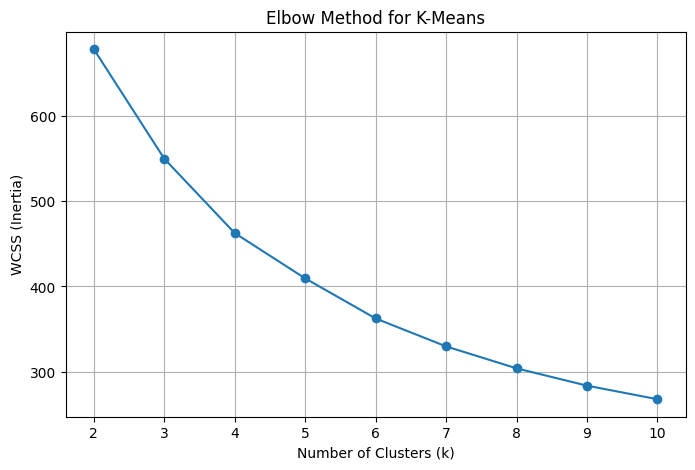

✅ Elbow plot saved in: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\clustering_results\k_means\elbow\elbow_plot.png


In [49]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ================================
# 1️⃣ CONFIGURE DIRECTORIES
# ================================
base_dir = r"D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering"
workflow_dir = os.path.join(base_dir, "workflow_01")

# Paths to normalized file
file_norm = os.path.join(workflow_dir, "normalized_data", "co_localized_cubic_res0.002_normalized.csv")

# Output folder for K-Means results
cluster_results_folder = os.path.join(workflow_dir, "clustering_results", "k_means")

# A new subfolder specifically for elbow plots
elbow_folder = os.path.join(cluster_results_folder, "elbow")
os.makedirs(elbow_folder, exist_ok=True)

# ================================
# 2️⃣ LOAD NORMALIZED DATA
# ================================
df = pd.read_csv(file_norm)

# Variables used for clustering
features_norm = ["DEM", "Mag_Final", "Pot_final", "Tho_Final", "Ura_Final"]
X = df[features_norm].values

# ================================
# 3️⃣ ELBOW METHOD
# ================================
k_values = range(2, 11)  # for example k=2..10
wcss = []

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init=20,
        max_iter=500,
        tol=1e-3,
        random_state=42
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# ================================
# 4️⃣ PLOT ELBOW CURVE
# ================================
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o')
plt.title("Elbow Method for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)

# Save the elbow plot in the new folder
elbow_plot_file = os.path.join(elbow_folder, "elbow_plot.png")
plt.savefig(elbow_plot_file, dpi=300)
plt.show()

print(f"✅ Elbow plot saved in: {elbow_plot_file}")


#### Create clusters

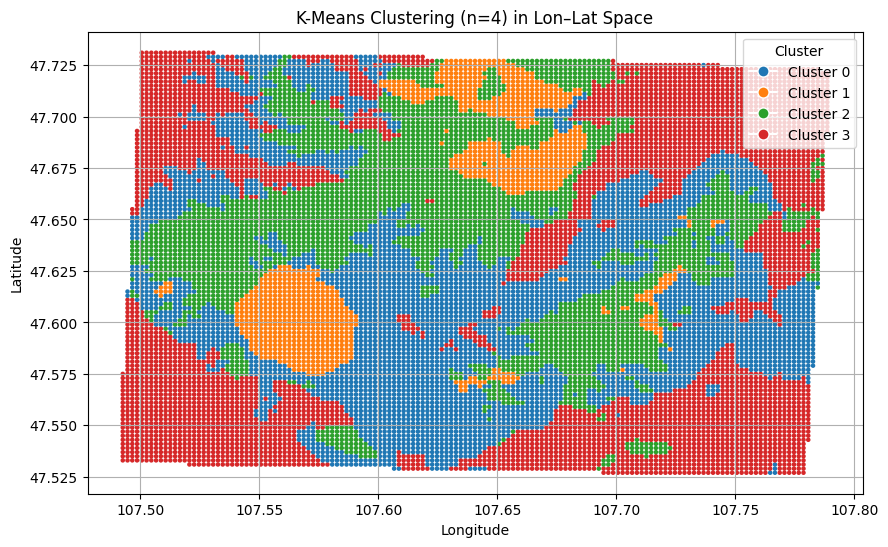

✅ Cluster map saved: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\clustering_results\k_means\cluster_maps\kmeans_4clusters_init-k-means++_ninit-20_maxiter-500_tol-0.001\clustering_map_kmeans_4clusters_init-k-means++_ninit-20_maxiter-500_tol-0.001.png
✅ Clustered data saved in: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\clustering_results\k_means\cluster_maps\kmeans_4clusters_init-k-means++_ninit-20_maxiter-500_tol-0.001\clustered_data_kmeans_4clusters_init-k-means++_ninit-20_maxiter-500_tol-0.001.csv


In [47]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# ================================
# 1️⃣ CONFIGURE DIRECTORIES
# ================================
base_dir = r"D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering"
workflow_dir = os.path.join(base_dir, "workflow_01")

# Paths to original and normalized files
file_orig = os.path.join(workflow_dir, "regularization", "interpolation_cubic", "co_localized_cubic_res0.002.csv")
file_norm = os.path.join(workflow_dir, "normalized_data", "co_localized_cubic_res0.002_normalized.csv")

# Output folders
cluster_results_folder = os.path.join(workflow_dir, "clustering_results", "k_means")
cluster_maps_folder = os.path.join(cluster_results_folder, "cluster_maps")
os.makedirs(cluster_maps_folder, exist_ok=True)

# ================================
# 2️⃣ LOAD DATAFRAMES
# ================================
df_orig = pd.read_csv(file_orig)   # Original (non-normalized)
df_norm = pd.read_csv(file_norm)   # Normalized (for clustering)

# Ensure both dataframes have the same row alignment
assert len(df_orig) == len(df_norm), "Error: DataFrames have different lengths!"

# ================================
# 3️⃣ SPECIFY FEATURES FOR CLUSTERING
# ================================
features_norm = ["DEM", "Mag_Final", "Pot_final", "Tho_Final", "Ura_Final"]  # Used for K-Means
features_orig = ["DEM", "Mag_Final", "Pot_final", "Tho_Final", "Ura_Final"]  # Used for visualization

# ================================
# 4️⃣ SET K-MEANS PARAMETERS & RUN
# ================================
n_clusters = 4   # Number of clusters
init_method = "k-means++"  # Initialization method
n_init = 20  # Number of runs
max_iter = 500  # Maximum iterations
tol = 1e-3  # Convergence tolerance

# Generate a folder name with parameters
run_id = f"kmeans_{n_clusters}clusters_init-{init_method}_ninit-{n_init}_maxiter-{max_iter}_tol-{tol}"
run_cluster_map_folder = os.path.join(cluster_maps_folder, run_id)
os.makedirs(run_cluster_map_folder, exist_ok=True)

# Apply K-Means
kmeans = KMeans(
    n_clusters=n_clusters,
    init=init_method,
    n_init=n_init,
    max_iter=max_iter,
    tol=tol,
    random_state=42
)

df_norm["Cluster"] = kmeans.fit_predict(df_norm[features_norm])

# Copy cluster labels to the original DataFrame
df_orig["Cluster"] = df_norm["Cluster"]

# ================================
# 5️⃣ DEFINE A CONSISTENT COLOR PALETTE
# ================================
num_clusters = df_orig["Cluster"].nunique()
cluster_palette = sns.color_palette("tab10", num_clusters)
cluster_sorted = sorted(df_orig["Cluster"].unique())  # e.g., [0,1,2,3]
cluster_color_map = {cl: cluster_palette[i] for i, cl in enumerate(cluster_sorted)}

# Save cluster color mapping for consistency
color_map_file = os.path.join(run_cluster_map_folder, f"cluster_color_map_{run_id}.csv")
pd.DataFrame.from_dict(cluster_color_map, orient="index", columns=["R", "G", "B"]).to_csv(color_map_file)

# ================================
# 6️⃣ PLOT CLUSTER MAP (Lon–Lat)
# ================================
plt.figure(figsize=(10, 6))
colors_for_scatter = df_orig["Cluster"].map(cluster_color_map)
plt.scatter(df_orig["Lon"], df_orig["Lat"], c=colors_for_scatter, s=5)
plt.title(f"K-Means Clustering (n={n_clusters}) in Lon–Lat Space")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Create a legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f"Cluster {cl}",
                          markerfacecolor=cluster_color_map[cl], markersize=8) for cl in cluster_sorted]
plt.legend(handles=legend_elements, title="Cluster", loc="upper right")

map_filename = os.path.join(run_cluster_map_folder, f"clustering_map_{run_id}.png")
plt.savefig(map_filename, dpi=300)
plt.show()

print(f"✅ Cluster map saved: {map_filename}")

# ================================
# 7️⃣ SAVE DATA WITH CLUSTERS
# ================================
output_file = os.path.join(run_cluster_map_folder, f"clustered_data_{run_id}.csv")
df_orig.to_csv(output_file, index=False)

print(f"✅ Clustered data saved in: {output_file}")


## Geophysical signatures


=== DEM Geophysical Signature ===
                mean        std          min          max  count
Cluster                                                         
0        1678.110061  45.813989  1552.674263  1811.579820   2296
1        1865.098020  50.343799  1705.359102  1972.967515    844
2        1609.482323  39.364894  1490.408053  1673.574181   2517
3        1769.267307  37.808741  1681.102700  1893.658555   3321
4        1636.291512  40.780472  1425.262128  1721.480417   3079
5        1731.637005  49.572622  1662.541867  1932.611008   1685
6        1761.892258  46.622983  1639.200112  1873.336339    730

=== Mag_Final Geophysical Signature ===
              mean        std        min         max  count
Cluster                                                    
0        -4.910932  20.680052 -49.878204  155.004165   2296
1         6.362811  25.336280 -40.060467  231.001027    844
2       -13.496521  29.432188 -53.045964  299.666050   2517
3        17.066910  46.300962 -62.64323

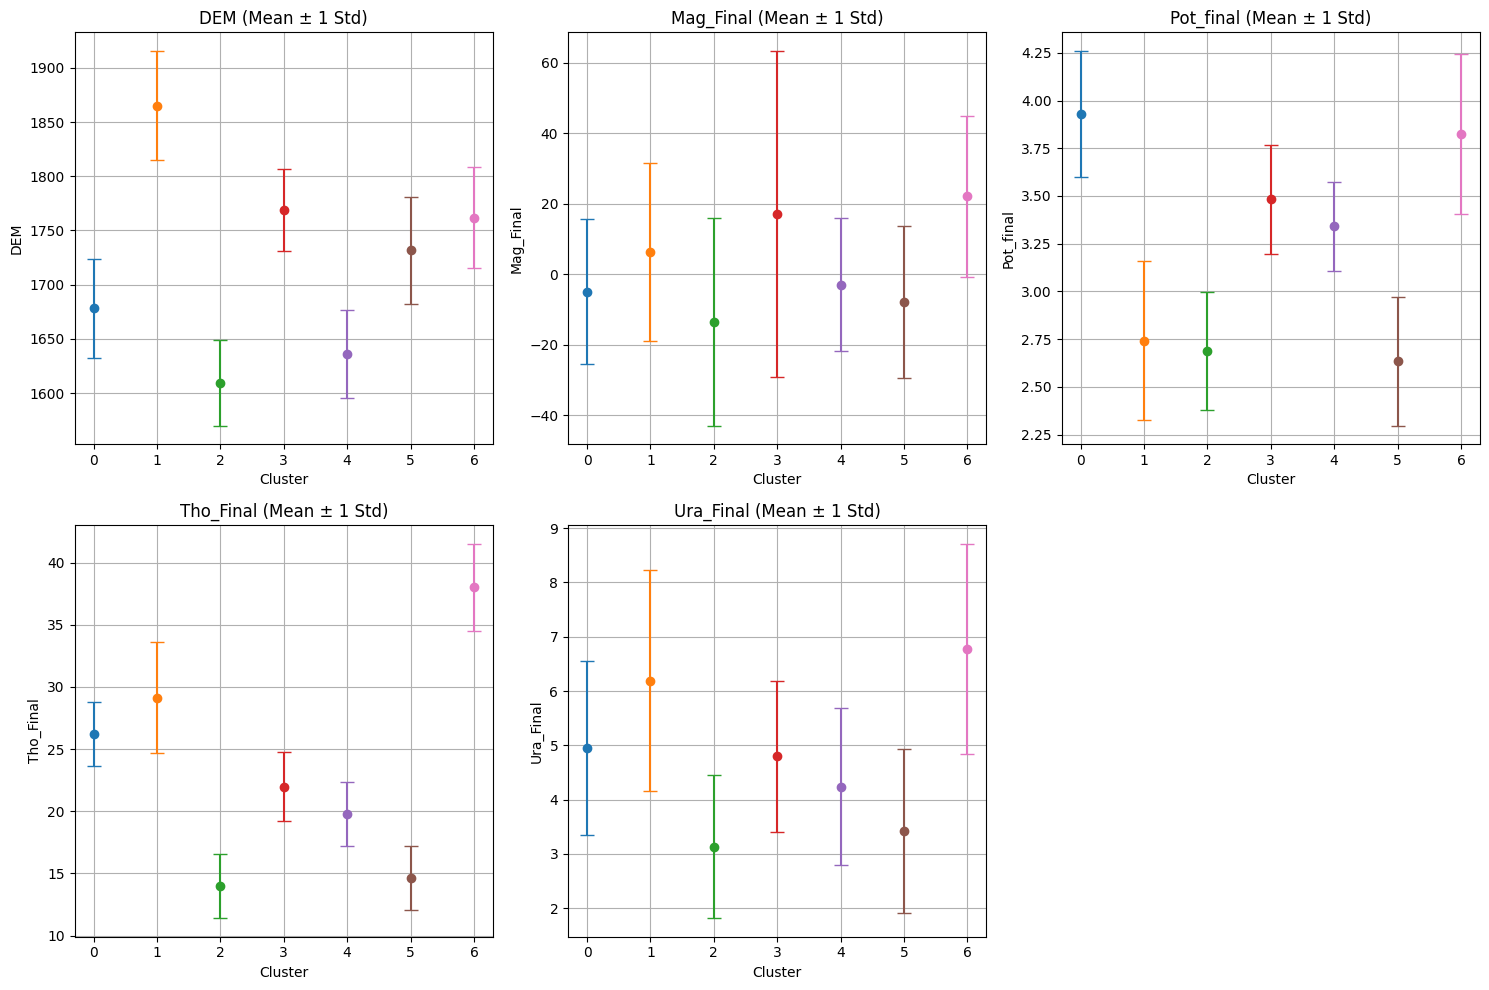

✅ Geophysical signatures mosaic saved: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\clustering_results\k_means\geophysical_signatures\kmeans_7clusters_init-k-means++_ninit-20_maxiter-500_tol-0.001\geophysical_signatures_mosaic.png


In [43]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# 1️⃣ LOAD CLUSTERED DATA
# ================================
base_dir = r"D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering"
workflow_dir = os.path.join(base_dir, "workflow_01")

# Define clustering parameters (must match the clustering script)
n_clusters = 7  # Must match the previous script
init_method = "k-means++"
n_init = 20
max_iter = 500
tol = 1e-3

# Generate a folder name with parameters
run_id = f"kmeans_{n_clusters}clusters_init-{init_method}_ninit-{n_init}_maxiter-{max_iter}_tol-{tol}"

# Path to clustered data
file_path = os.path.join(workflow_dir, "clustering_results", "k_means", "cluster_maps", run_id, f"clustered_data_{run_id}.csv")

# Load clustered data
df = pd.read_csv(file_path)

# Load the cluster color mapping
color_map_file = os.path.join(workflow_dir, "clustering_results", "k_means", "cluster_maps", run_id, f"cluster_color_map_{run_id}.csv")
cluster_color_df = pd.read_csv(color_map_file, index_col=0)
cluster_color_map = {int(cluster): tuple(row) for cluster, row in cluster_color_df.iterrows()}

# ================================
# 2️⃣ PLOT GEOFISICAL SIGNATURES
# ================================
features = ["DEM", "Mag_Final", "Pot_final", "Tho_Final", "Ura_Final"]

# Create a unique folder for this run inside "geophysical_signatures"
signature_folder = os.path.join(workflow_dir, "clustering_results", "k_means", "geophysical_signatures", run_id)
os.makedirs(signature_folder, exist_ok=True)

# Create a mosaic plot with all features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    if i >= len(axes):
        break

    ax = axes[i]
    
    # Compute statistics for original values
    stats = df.groupby("Cluster")[feature].agg(["mean", "std", "min", "max", "count"])
    means = stats["mean"].values
    stds = stats["std"].values
    cluster_idx = stats.index
    x_positions = np.arange(len(cluster_idx))

    # Print statistics in console
    print(f"\n=== {feature} Geophysical Signature ===")
    print(stats)

    # Plot error bars
    for j, cl in enumerate(cluster_idx):
        ax.errorbar(x_positions[j], means[j], yerr=stds[j], fmt='o',
                     color=cluster_color_map[cl], ecolor=cluster_color_map[cl],
                     capsize=5, label=f"Cluster {cl}" if j == 0 else "")

    ax.set_title(f"{feature} (Mean ± 1 Std)")
    ax.set_xlabel("Cluster")
    ax.set_ylabel(feature)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(cluster_idx)
    ax.grid(True)

# Hide unused subplots
for k in range(len(features), len(axes)):
    axes[k].set_visible(False)

plt.tight_layout()
sig_mosaic_file = os.path.join(signature_folder, "geophysical_signatures_mosaic.png")
plt.savefig(sig_mosaic_file, dpi=300)
plt.show()

print(f"✅ Geophysical signatures mosaic saved: {sig_mosaic_file}")


## 6. Export the shapefile to QGIS

Crear shapefile

In [39]:
import pandas as pd
import geopandas as gpd
import os
from shapely.geometry import Point

# ================================
# 1️⃣ CONFIGURE DIRECTORIES
# ================================
base_dir = r"D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering"
workflow_dir = os.path.join(base_dir, "workflow_01")

# Define clustering parameters (must match the clustering script)
n_clusters = 5  # Must match the previous script
init_method = "k-means++"
n_init = 20
max_iter = 500
tol = 1e-3

# Generate a folder name with parameters
run_id = f"kmeans_{n_clusters}clusters_init-{init_method}_ninit-{n_init}_maxiter-{max_iter}_tol-{tol}"

# Path to clustered data
file_path = os.path.join(workflow_dir, "clustering_results", "k_means", "cluster_maps", run_id, f"clustered_data_{run_id}.csv")

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Error: The file {file_path} does not exist. Run the clustering script first.")

# Load clustered data
df = pd.read_csv(file_path)

# ================================
# 2️⃣ CONVERT TO SHAPEFILE FORMAT
# ================================
# Create a new folder for shapefiles
shapefile_folder = os.path.join(workflow_dir, "clustering_results", "k_means", "shapefiles")
os.makedirs(shapefile_folder, exist_ok=True)

# Convert DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Lon'], df['Lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Define output path
shapefile_path = os.path.join(shapefile_folder, f"clusters_{run_id}.shp")

# Save as Shapefile
gdf.to_file(shapefile_path)

print(f"✅ Shapefile successfully created: {shapefile_path}")


✅ Shapefile successfully created: D:\Pablo\QGIS\Mongolia\python_manipular_datos\clustering\workflow_01\clustering_results\k_means\shapefiles\clusters_kmeans_5clusters_init-k-means++_ninit-20_maxiter-500_tol-0.001.shp
